In [1]:
import json

with open('train_syn.json', 'r') as f:
    data = json.load(f)

In [3]:
dir2publaynet = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Publaynet"
split = "train"

In [5]:
sample = data[0]
sample

{'image_id': 14,
 'category_id': 1,
 'bbox': [35.89, 258.49, 248.07, 183.23],
 'category': 'text',
 'file_name': 'PMC6021432_00000.jpg'}

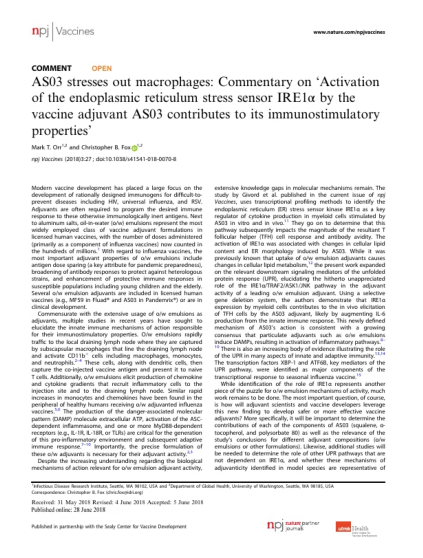

In [10]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))

img = plt.imread(f"{dir2publaynet}/{split}/{sample['file_name']}")
plt.imshow(img)
plt.axis('off')
plt.show()

In [17]:
dir2signatures = "C:/Users/Maria/OneDrive - UAB/Documentos/3r de IA/Synthesis project II/Github/Project_Synthesis2-/Datasets/Signatures_dataset/"
dataset = "dataset3"

# read all images and split them into train, val and test
import os

images = os.listdir(f"{dir2signatures}/{dataset}/forge")
# images = [img for img in images if img.endswith(".jpg")]

import random

random.shuffle(images)

train_images = images[:int(0.8 * len(images))]
val_images = images[int(0.8 * len(images)):int(0.9 * len(images))]
test_images = images[int(0.9 * len(images)):]

# create json files
data = []
for img in train_images:
    data.append({"file_name": img, "split": "train"})
    
for img in val_images:
    data.append({"file_name": img, "split": "val"})
    
for img in test_images:
    data.append({"file_name": img, "split": "test"})
    
with open(f"{dir2signatures}ds3_splits.json", 'w') as f:
    json.dump(data, f)
    

print(f"Number of train images: {len(train_images)}")
print(f"Number of val images: {len(val_images)}")
print(f"Number of test images: {len(test_images)}")

Number of train images: 120
Number of val images: 15
Number of test images: 15
